<a href="https://colab.research.google.com/github/MatsubaraSoda/College-Algebra/blob/main/2_5_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**total squared error**

**least squares regression**

**correlation coefficient**

**coefficient of determination**

---


## A Simple Example

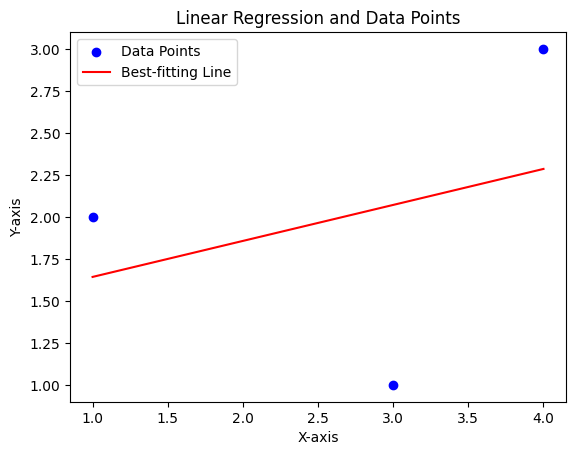

Best-fitting equation:  
0.2143 x + 1.429
Correlation coefficient: 0.32732683535398854
Coefficient of determination (R-squared): 0.10714285714285687


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
x = np.array([1, 3, 4])
y = np.array([2, 1, 3])

# Performing linear regression
coefficients = np.polyfit(x, y, 1)
poly_fit = np.poly1d(coefficients)

# Calculating correlation coefficient
correlation_coefficient = np.corrcoef(x, y)[0, 1]

# Calculating coefficient of determination (R-squared)
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - poly_fit(x))**2)
r_squared = 1 - (ss_residual / ss_total)

# Plotting the points
plt.scatter(x, y, color='blue', label='Data Points')

# Plotting the best-fitting line
x_line = np.linspace(min(x), max(x), 100)
y_line = poly_fit(x_line)
plt.plot(x_line, y_line, color='red', label='Best-fitting Line')

# Adding labels and a legend
plt.title('Linear Regression and Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Displaying the plot
plt.show()

# Displaying results
print("Best-fitting equation:", poly_fit)
print("Correlation coefficient:", correlation_coefficient)
print("Coefficient of determination (R-squared):", r_squared)


## Example 2.5.1.

| Year | Energy Usage, in Quads |
|:---:|:---:|
| 1950 | 34.6 |
| 1960 | 45.1 |
| 1970 | 67.8 |
| 1980 | 78.3 |
| 1990 | 84.6 |
| 2000 | 98.9 |

Using the energy consumption data given above,

1. Plot the data using a graphing calculator.
2. Find the least squares regression line and comment on the goodness of fit.
3. Interpret the slope of the line of best fit.
4. Use the regression line to predict the annual US energy consumption in the year 2013.
5. Use the regression line to predict when the annual consumption will reach 120 Quads.



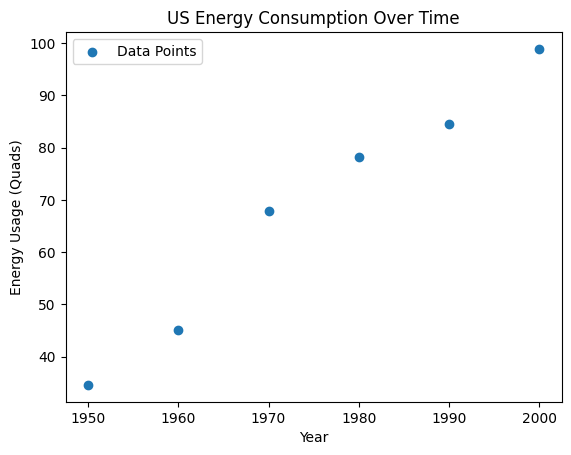

The equation of the least squares regression line:  
1.287 x - 2474
Correlation coefficient: 0.9869964039430784
Coefficient of determination (R-squared): 0.9741619013965684
When x = 2013, y = 117.128095238094
When y = 120, x = 2015.23122456530


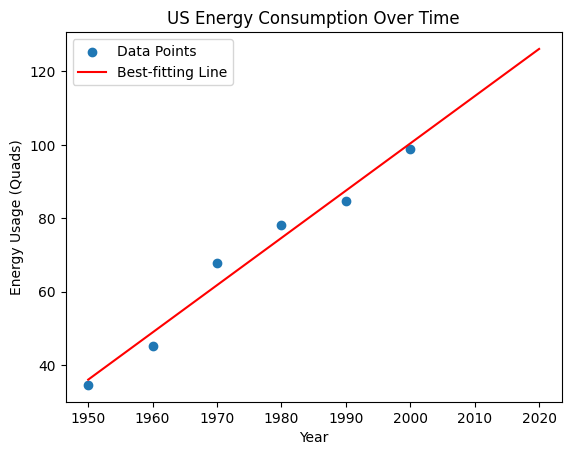

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex

# Given data
x = np.array([1950, 1960, 1970, 1980, 1990, 2000]) # x stand for the years
y = np.array([34.6, 45.1, 67.8, 78.3, 84.6, 98.9]) # y stand for the energy_usage

# 1
# Plot the data
plt.scatter(x, y, label='Data Points')
plt.title('US Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Usage (Quads)')
plt.legend()
plt.show()

# 2
# Performing linear regression
coefficients = np.polyfit(x, y, 1)
poly_fit = np.poly1d(coefficients)
print("The equation of the least squares regression line:", poly_fit)
# Calculating correlation coefficient
correlation_coefficient = np.corrcoef(x, y)[0, 1]
print("Correlation coefficient:", correlation_coefficient)
r_squared = correlation_coefficient ** 2
print("Coefficient of determination (R-squared):", r_squared)

# 3
# SKIP

# 4 and 5
# Convert to Sympy expression
x_sym = sp.symbols('x')
poly_fit_sympy = sp.Poly(poly_fit(x_sym), domain='RR')

# Finding y when x = 2013
x_value = 2013
y_value_at_2013 = poly_fit_sympy.subs(x_sym, x_value)
print(f"When x = {x_value}, y = {y_value_at_2013.evalf()}")

# Finding x when y = 120
y_value = 120
x_values_at_y_120 = sp.solve(poly_fit_sympy - y_value, x_sym)
for x_val in x_values_at_y_120:
    print(f"When y = {y_value}, x = {x_val.evalf()}")

# 6 Plot the data and the least squares regression line
# Data
plt.scatter(x, y, label='Data Points')
# Line
x_line = np.linspace(min(x), 2020, 100)
y_line = poly_fit(x_line)
plt.plot(x_line, y_line, color='red', label='Best-fitting Line')
# Plot setting
plt.title('US Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Usage (Quads)')
plt.legend()
plt.show()


## Example 2.5.2.

According to the National Weather Service, the predicted hourly temperatures for Painesville on March 3, 2009 were given as summarized below.

| Time | Temperature, &deg;F |
|:---:|:---:|
| 10AM | 17 |
| 11AM | 19 |
| 12PM | 21 |
| 1PM | 23 |
| 2PM | 24 |
| 3PM | 24 |
| 4PM | 23 |

Using the quadratic model for the temperature data above, predict the warmest temperature of the day.


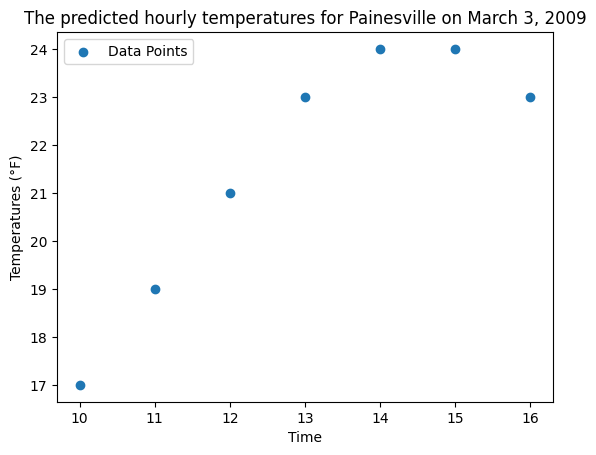

The equation of the least squares regression curve:
         2
-0.3214 x + 9.464 x - 45.86
The warmest temperature of the day: 23.8105158730159 °F


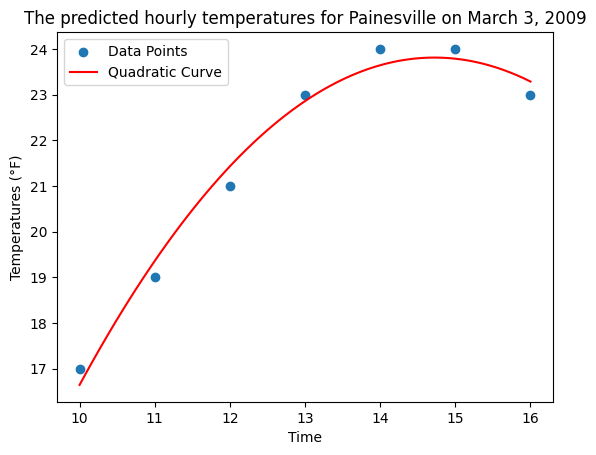

In [25]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex

# Given data
x = np.array([10, 11, 12, 13, 14, 15, 16]) # x stand for the time
y = np.array([17, 19, 21, 23, 24, 24, 23]) # y stand for the temperatures

# 1
# Plot the data
plt.scatter(x, y, label='Data Points')
plt.title('The predicted hourly temperatures for Painesville on March 3, 2009')
plt.xlabel('Time')
plt.ylabel('Temperatures (°F)')
plt.legend()
plt.show()

# 2
# Performing regression
coefficients = np.polyfit(x, y, 2)
poly_fit = np.poly1d(coefficients)
print("The equation of the least squares regression curve:")
print(poly_fit)

# 3 predict the warmest temperature of the day
# Convert to Sympy expression
x_sym = sp.symbols('x')
poly_fit_sympy = sp.Poly(poly_fit(x_sym), domain='RR')
y_the_warmest_temperature = poly_fit_sympy.subs(x_sym, -(coefficients[1]/(2*coefficients[0])))
print("The warmest temperature of the day:", y_the_warmest_temperature, "°F")

# Finally: Plot the data and the regression
# Data
plt.scatter(x, y, label='Data Points')
# Line
x_line = np.linspace(min(x), max(x), 100)
y_line = poly_fit(x_line)
plt.plot(x_line, y_line, color='red', label='Quadratic Curve')
# Plot setting
plt.title('The predicted hourly temperatures for Painesville on March 3, 2009')
plt.xlabel('Time')
plt.ylabel('Temperatures (°F)')
plt.legend()
plt.show()
